In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import os

In [6]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [7]:
path_img='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016'
file_img='fileno016.fits'
object_name='fileno016'

In [8]:
fullfile=os.path.join(path_img,file_img)

In [9]:
hdu_list=fits.open(fullfile)
hdu_list.info()

Filename: /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/fileno016.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     135   (2168, 2048)   int16 (rescales to uint16)   


In [10]:
image_data = hdu_list[0].data

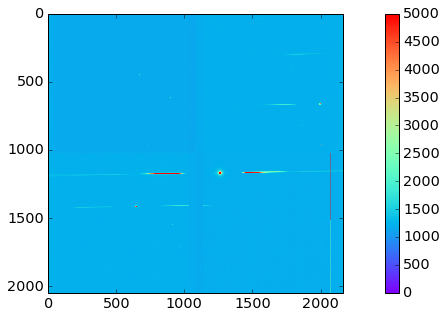

In [28]:
im=plt.imshow(image_data,cmap='rainbow',vmin=0,vmax=5000)
plt.colorbar(im)

In [12]:
!ls *.py

compute.py                   overscan_subtract_andTrim.py
hapi.py                      skylev.py
header.py                    telinst.py


In [13]:
import header as header

In [19]:
%run header.py /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/fileno016.fits -k AIRMASS OBJECT DATE-OBS

/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/fileno016.fits [1.05, 'HD205905', '2016-08-23T02:55:43.922']


In [18]:
%run overscan_subtract_andTrim.py /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/fileno016.fits

In [20]:
!ls


FirstSpectrum_fileno016.ipynb       Spec_Search_FraunhauferAbsLines.png
FirstSpectrum_fileno016.pdf         TestAugustinScripts.ipynb
FirstSpectrum_fileno016.slides.html ViewfirstImage.ipynb
Histo2D.ipynb                       compute.py
HitranData.ipynb                    fileno016.png
Slide_FirstSpectrum.ipynb           hapi.py
Slide_FirstSpectrum.pdf             header.py
Slide_FirstSpectrum.slides.html     header.pyc
Spec_Search_AbsLines.jpg            image.png
Spec_Search_AbsLines.pdf            imagebgsub.png
Spec_Search_AbsLines.png            imagerot.png
Spec_Search_AbsLinesCheckPos.png    overscan_subtract_andTrim.py
Spec_Search_AbsLines_Check.png      skylev.py
Spec_Search_AbsLines_CheckFit.png   telinst.py
Spec_Search_AbsLines_CheckFit2.png  telinst.pyc
Spec_Search_AbsLines_CheckFit3.png  templates
Spec_Search_FRO2_AbsLines_Check.png trim_fileno016.fits


In [33]:
trim_hdu_list=fits.open('trim_fileno016.fits')
trim_hdu_list.info()

Filename: trim_fileno016.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     133   (2048, 2048)   float64   


In [34]:
trim_image_data = trim_hdu_list[0].data

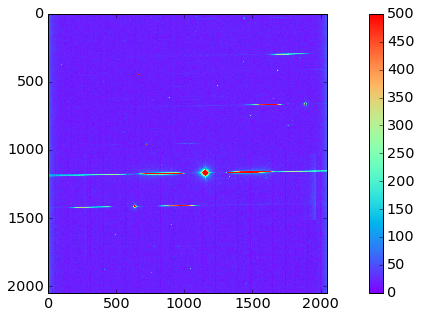

In [35]:
im=plt.imshow(trim_image_data,cmap='rainbow',vmin=0,vmax=500)
plt.colorbar(im)

In [30]:
import overscan_subtract_andTrim as ovsubtrim

In [31]:
ovsubtrim.Do_overscan_subtract_andTrim(fullfile)